In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded survey form must be entirely filled out and submitted on or before **11:59pm on Wednesday September 23**.  Students must come to class the next day prepared to discuss the material covered in this assignment. answer

# Pre-Class Assignment: Code Optimization

## a.k.a. making your research go faster!!!

# Goals for today's pre-class assignment 

</p>

1. [Matrix Multiply Example](#Matrix_Multiply_Example)
1. [How to build a Supercomputer](#How_to_build_a_Supercomputer)
1. [Install required software](#Install_required_software)
1. [Logging onto the HPCC](#Logging_onto_the_HPCC)
1. [Using git on the HPCC](#Using_git_on_the_HPCC)
1. [Assignment Wrap-up](#Assignment_wrap-up)

---
<a name="Matrix_Multiply_Example"></a>
# 1. Matrix Multiply Example

 The following is a simple implementation of a matrix multiply. Review the code try to understand what it is doing.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import random
import time
sp.init_printing(use_unicode=True)

In [2]:
#simple matrix multiply (no numpy)
def multiply(m1,m2):
    m = len(m1)
    d = len(m2)
    n = len(m2[0])
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    result = [[0 for i in range(m)] for j in range(n)]
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result

In [3]:
# Random generated 2d lists of lists that can be multiplied 
m = 4
d = 10
n = 4

A = [[random.random() for i in range(d)] for j in range(m)]
B = [[random.random() for i in range(n)] for j in range(d)]

In [4]:
#Compute matrix multiply using your function
start = time.time()

simple_answer = multiply(A, B)
simple_time = time.time()-start

print('simple_answer =',simple_time,'seconds')

simple_answer = 0.00016021728515625 seconds


Lets compare this to the numpy result:

In [5]:
#Compare to numpy result
start = time.time()

np_answer = np.matrix(A)*np.matrix(B)
np_time = time.time()-start

print('np_answer =',np_time,'seconds')


np_answer = 0.0030455589294433594 seconds


For this example, numpy result are most likely slower than the simple result.  Think about why this might be.  We will discuss this later. 

&#9989; **<font color=red>DO THIS:</font>**  See if you can write a loop to do a scaling study for the above code.  Loop over the value of $n$ such that $n$ is 4, 16, 32, 64, 128 and 256.  For each iteration generate two random matrices (as above) with $m = d = n$. Then time the matrix multiply for the provided function and again for the numpy function. Graph the results as size of $n$ vs time.  

n 4
simple_answer = 3.147125244140625e-05 seconds
np_answer = 0.0003025531768798828 seconds
n 16
simple_answer = 0.0012805461883544922 seconds
np_answer = 0.00010704994201660156 seconds
n 32
simple_answer = 0.009999275207519531 seconds
np_answer = 0.0004210472106933594 seconds
n 64
simple_answer = 0.07521200180053711 seconds
np_answer = 0.0005955696105957031 seconds
n 128
simple_answer = 0.6044666767120361 seconds
np_answer = 0.0019345283508300781 seconds
n 256
simple_answer = 4.807276010513306 seconds
np_answer = 0.008601188659667969 seconds


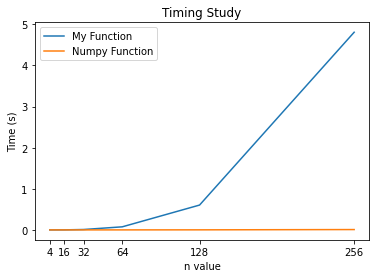

In [6]:
my_times = []
np_times = []
for n in [4,16,32,64,128,256]:
    A = [[random.random() for i in range(n)] for j in range(n)]
    B = [[random.random() for i in range(n)] for j in range(n)]
    start = time.time()
    simple_answer = multiply(A, B)
    simple_time = time.time()-start
    my_times.append(simple_time)
    start = time.time()
    np_answer = np.matrix(A)*np.matrix(B)
    np_time = time.time()-start
    np_times.append(np_time)
    print('n',n)
    print('simple_answer =',simple_time,'seconds')
    print('np_answer =',np_time,'seconds')
    
    
en = [4,16,32,64,128,256]
plt.title('Timing Study')
plt.plot(en,my_times,label='My Function')
plt.plot(en,np_times,label='Numpy Function')
plt.xlabel('n value')
plt.xticks(en)
plt.ylabel('Time (s)')
plt.legend()
plt.show()

&#9989; **<font color=red>DO THIS:</font>**  Explore the Internet for ways to speed up Python (There are a lot of them).  Save some of your search results in the cell below and come to class prepaired to discuss what you found.

https://wiki.python.org/moin/PythonSpeed/PerformanceTips

----
<a name="How_to_build_a_Supercomputer"></a>
# 2. How to build a Supercomputer
In addition to making your code go faster we can use a faster computer...


Your instructor submitted a request to get you an account on the MSU High Performance Computer (HPC).  The following videos try to explain the system and how to gain access.  We will be using these accounts in class. See if you can log in.

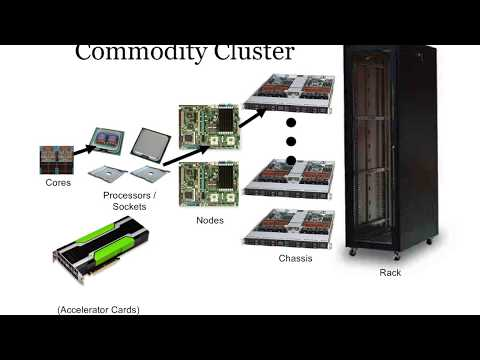

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("6oyoS-ddUH0",width=640,height=360, cc_load_policy=True)

----
<a name="Install_required_software"></a>

# 3. Install required software

Normally, you need special software to log onto the MSU HPCC.  Sometimes this software is pre-installed on your computer, and sometimes it is not.  Fortunately the HPCC has a new interface called [OpenOnDemand](http://ondemand.hpcc.msu.edu/).  You can log into OpenOnDemand using your MSU netid and password (using Google MSU account) and you will get to a website interface that has everything you need to work on the HPCC.  Here is a video introducing you to OpenOnDemand:

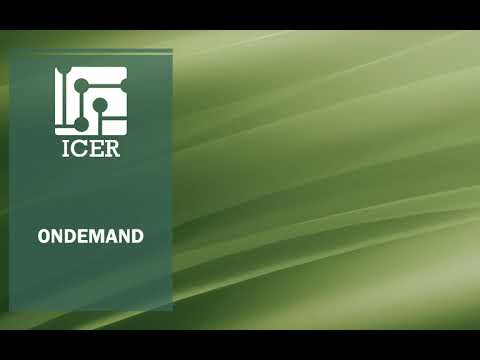

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("FMxa72hg3PA",width=640,height=360, cc_load_policy=True)

If you are at a university without OpenOnDemand you will have to install the software the "old fasioned way".  In order to access the HPC you would need an SSH client and optionally an X11 client (For graphics).

- SSH and SCP client - pre-installed on Mac/Linux, Lots of options for Windows. Ex: [MobaXterm](https://mobaxterm.mobatek.net/) - 
- X11 client - [XQuartz](https://www.xquartz.org/) on Mac, pre-installed on Linux, Lots of options for Windows. Ex [MobaXterm](https://mobaxterm.mobatek.net/)
/
Note, there are a lot of options here. It is the responsibility of the student to make sure their software is running properly.

&#9989; **<font color=red>QUESTION:</font>** Are you able to log on to the HPCC and if not, where did you get stuck?

Yes I am

----

<a name="Using_git_on_the_HPCC"></a>
# 5. Using git and Jupyter on the HPCC

## Step 1:
Log into one of the developer nodes using OpenOnDemand and clone the course git repository:

```
git clone https://gitlab.msu.edu/cmse802-f20/cmse802-f20

```

## Step 2:
Go to the "Interactive Applications" and select "Jupyter NOtebooks".  For now just use the default settings and hit "Launch".  

## Step 3:
WHen the connection is made, click on the link for the Jupyter Notebook, navigate to the course website and open up todays assignment.

----
<a name="Assignment_wrap-up"></a>
# 6. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link to Google Form](https://cmse.msu.edu/cmse802-pc-survey)


If you have trouble with the embedded form, please make sure you log on with your MSU google account at [googleapps.msu.edu](https://googleapps.msu.edu) and then click on the direct link above.

&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** Are you able to log on to the HPCC using OpenOnDemand , get the course repository cloned and open up a jupyter notebook?  If not, where did you get stuck?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [9]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse802-pc-survey?embedded=true" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above survey form on or before the assignment due date.

### Course Resources:


- [Website](https://msu-cmse-courses.github.io/cmse802-f20-student/)
- [ZOOM](https://msu.zoom.us/j/97272546850)
- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vT9Wn11y0ECI_NAUl_2NA8V5jcD8dXKJkqUSWXjlawgqr2gU5hII3IsE0S8-CPd3W4xsWIlPAg2YW7D/pub)
- [Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vQRAm1mqJPQs1YSLPT9_41ABtywSV2f3EWPon9szguL6wvWqWsqaIzqkuHkSk7sea8ZIcIgZmkKJvwu/pubhtml?gid=2142090757&single=true)



Written by Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.